<a href="https://colab.research.google.com/github/Duy76/BTVN/blob/main/nhan_dien_mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/nhan dien mon an

/content/drive/MyDrive/Colab Notebooks/nhan dien mon an


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhan dien mon an/train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 360 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/nhan dien mon an/Validation ',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 360 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Banh cuon ': 0,
 'Banh mi ': 1,
 'Banh pia ': 2,
 'Banh tet ': 3,
 'Banh xeo ': 4,
 'Bun dau mam tom ': 5,
 'Ca kho to ': 6,
 'Com tam ': 7,
 'Nem ': 8,
 'Pho ': 9}

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/nhan_mon_an/Validation/Validation

/content/drive/.shortcut-targets-by-id/1JcIkwRTG7AZWthLrhjBThj82fNs4uUIf/nhan_mon_an/Validation/Validation


In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 10 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
12/12 [==============================] - 287s 25s/step - loss: 3.1688 - accuracy: 0.1306 - val_loss: 2.2997 - val_accuracy: 0.1083
Epoch 2/100
12/12 [==============================] - 12s 1s/step - loss: 2.3046 - accuracy: 0.0944 - val_loss: 2.2826 - val_accuracy: 0.1694
Epoch 3/100
12/12 [==============================] - 11s 995ms/step - loss: 2.2693 - accuracy: 0.1333 - val_loss: 2.1582 - val_accuracy: 0.1944
Epoch 4/100
12/12 [==============================] - 11s 998ms/step - loss: 2.1029 - accuracy: 0.2222 - val_loss: 2.0054 - val_accuracy: 0.2778
Epoch 5/100
12/12 [==============================] - 12s 1s/step - loss: 2.0491 - accuracy: 0.2222 - val_loss: 2.0555 - val_accuracy: 0.2306
Epoch 6/100
12/12 [==============================] - 12s 985ms/step - loss: 1.9901 - accuracy: 0.2917 - val_loss: 1.7437 - val_accuracy: 0.3861
Epoch 7/100
12/12 [==============================] - 12s 1s/step - loss: 1.8332 - accuracy: 0.3417 - val_loss: 1.7602 - val_accuracy: 0.3778
Ep

In [ ]:
# Lưu lại
model.save("nhan_dien_mon_an.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_mon_an.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.01752285100519657
Train Accuracy 0.9916666746139526


<function matplotlib.pyplot.show(*args, **kw)>

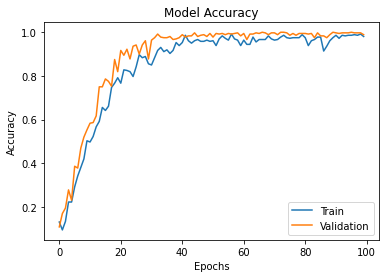

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F6773446C90>
1/1 [==============================] - 0s 18ms/step
Ten mon an: com tam
Chu thich: Du lieu nam trong Test1


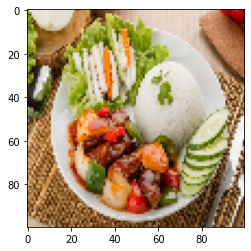

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67734C9C50>
1/1 [==============================] - 0s 17ms/step
Ten mon an: banh xeo
Chu thich: Du lieu nam trong Test1


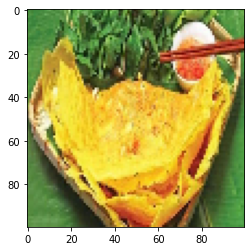

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67734AFBD0>
1/1 [==============================] - 0s 16ms/step
Ten mon an: banh mi
Chu thich: Du lieu nam trong Test1


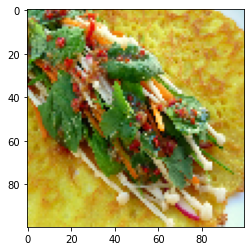

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67734B1ED0>
1/1 [==============================] - 0s 18ms/step
Ten mon an: nem
Chu thich: Du lieu nam trong Test1


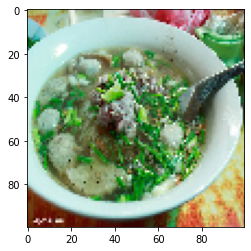

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67734B8ED0>
1/1 [==============================] - 0s 17ms/step
Ten mon an: com tam
Chu thich: Du lieu nam trong Test1


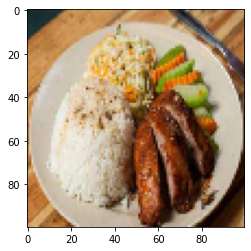

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67733D9E50>
1/1 [==============================] - 0s 17ms/step
Ten mon an: pho
Chu thich: Du lieu nam trong Test1


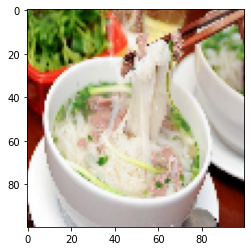

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F6773718510>
1/1 [==============================] - 0s 16ms/step
Ten mon an: nem
Chu thich: Du lieu nam trong Test1


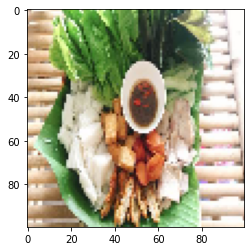

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F678655AF90>
1/1 [==============================] - 0s 24ms/step
Ten mon an: com tam
Chu thich: Du lieu nam trong Test1


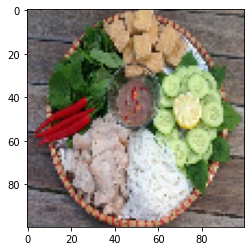

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67E0235F50>
1/1 [==============================] - 0s 23ms/step
Ten mon an: banh mi
Chu thich: Du lieu nam trong Test2


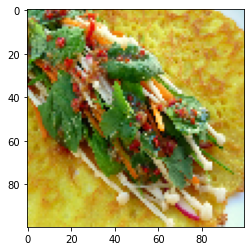

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67E0225B90>
1/1 [==============================] - 0s 17ms/step
Ten mon an: pho
Chu thich: Du lieu nam trong Test2


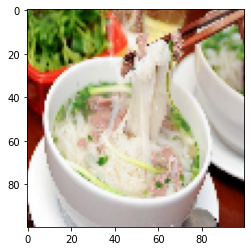

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67E01F2850>
1/1 [==============================] - 0s 17ms/step
Ten mon an: com tam
Chu thich: Du lieu nam trong Test2


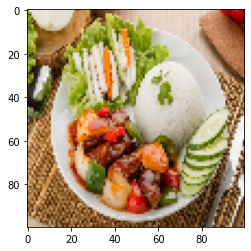

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67865E93D0>
1/1 [==============================] - 0s 16ms/step
Ten mon an: nem
Chu thich: Du lieu nam trong Test2


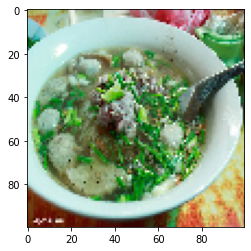

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F67865D2990>
1/1 [==============================] - 0s 16ms/step
Ten mon an: com tam
Chu thich: Du lieu nam trong Test2


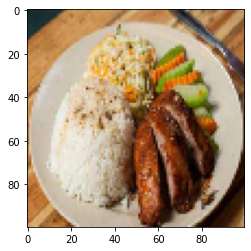

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F6773749AD0>
1/1 [==============================] - 0s 17ms/step
Ten mon an: nem
Chu thich: Du lieu nam trong Test2


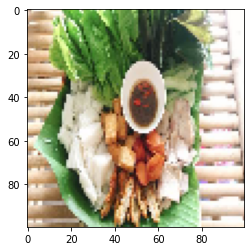

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F678652D750>
1/1 [==============================] - 0s 18ms/step
Ten mon an: banh xeo
Chu thich: Du lieu nam trong Test2


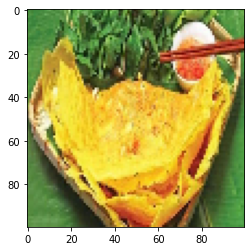

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F6773686ED0>
1/1 [==============================] - 0s 19ms/step
Ten mon an: com tam
Chu thich: Du lieu nam trong Test2


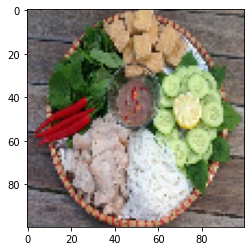

In [ ]:
test1="/content/drive/MyDrive/Colab Notebooks/nhan dien mon an/Test/Test1"
test2="/content/drive/MyDrive/Colab Notebooks/nhan dien mon an/Test/Test2"

test = [test1, test2 ]
stt = 0
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(100,100))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='banh cuon'
    if round(result[0][1])==1:
      prediction='banh mi'
    if round(result[0][2])==1:
      prediction='banh pia'
    if round(result[0][3])==1:
      prediction='bun tet'
    if round(result[0][4])==1:
      prediction='banh xeo'
    if round(result[0][5])==1:
      prediction='bun dau mam tom'
    if round(result[0][6])==1:
      prediction='ca kho to'
    if round(result[0][7])==1:
      prediction='com tam'
    if round(result[0][8])==1:
      prediction='nem'
    if round(result[0][9])==1:
      prediction='pho'
    print('Ten mon an:',prediction)
    print(f'Chu thich: Du lieu nam trong Test{stt}')
    plt.show()